## 07.05. 지수 평활에 대한 혁신 상태 공간 모델

이 장의 나머지 부분에서는 지금까지 살펴본 지수 평활 기법에 깔린 통계적인 모델을 공부하겠습니다. **지수 평활 기법은 점 예측값을 내는 알고리즘입니다. 이 절에서 다루는 통계 모델은 같은 점 예측값을 내는 동시에 예측 구간도 생성합니다.**

**통계 모델이란 전체 예측분포를 만들어줄 수 있는 무작위적 데이터 생성 과정입니다.** 여기에서 소개할 일반적인 통계적인 틀은 5 장에서 소개한 모델 선택 기준을 사용하는 방법도 제공하여, 모델을 객관적으로 선택할 수 있게 도와줍니다.

**각 모델은 관측된 데이터를 묘사하는 측정식(measurement equation)과, 아직 관측되지 않은 성분이나 상태(수준, 추세, 계절성)가 시간에 따라 어떻게 변하는지 기술하는 몇 가지 상태식(state equation)으로 구성됩니다. 이러한 이유에서 상태 공간 모델(state space models)이라고 부릅니다.**

**각 기법마다 두 가지 모델이 존재합니다. 하나는 덧셈 오차를, 다른 하나는 곱셈 오차를 이용합니다. 같은 평활 매개변수 값을 사용했다면, 모델이 낸 얻은 점 예측은 같습니다. 하지만, 모델은 다른 예측 구간을 생성할 것입니다.**

**덧셈 오차와 곱셈 오차를 사용하는 모델을 구분하기 위해**(그리고 또한 기법에서 모델을 구분하기 위해) 세 번째 문자 하나를 더 추가합니다. **(오차Error, 추세Trend, 계절성Seasonal)에 대해 각 상태 공간 모델을 ETS(⋅, ⋅, ⋅)로 나타냅니다.**

<table>
<caption>
<span id="tab:taxonomy"></span>지수 평활 기법을 2가지로 분류.
</caption>
<thead>
<tr>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: left; " colspan="1">
<div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">
추세 성분
</div>
</th>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: left; " colspan="3">
<div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">
계절 성분
</div>
</th>
</tr>
<tr>
<th style="text-align:left;background-color: #e6e6e6 !important;">
</th>
<th style="text-align:left;background-color: #e6e6e6 !important;">
N
</th>
<th style="text-align:left;background-color: #e6e6e6 !important;">
A
</th>
<th style="text-align:left;background-color: #e6e6e6 !important;">
M
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;font-weight: bold;background-color: #e6e6e6 !important;font-weight: bold;background-color: #e6e6e6 !important;">
</td>
<td style="text-align:left;font-weight: bold;background-color: #e6e6e6 !important;">
(없음)
</td>
<td style="text-align:left;font-weight: bold;background-color: #e6e6e6 !important;">
(덧셈)
</td>
<td style="text-align:left;font-weight: bold;background-color: #e6e6e6 !important;">
(곱셈)
</td>
</tr>
<tr>
<td style="text-align:left;background-color: #f6f6f6 !important;font-weight: bold;background-color: #e6e6e6 !important;">
N (없음)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(N,N)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(N,A)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(N,M)
</td>
</tr>
<tr>
<td style="text-align:left;background-color: #f6f6f6 !important;font-weight: bold;background-color: #e6e6e6 !important;">
A (덧셈)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A,N)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A,A)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A,M)
</td>
</tr>
<tr>
<td style="text-align:left;background-color: #f6f6f6 !important;font-weight: bold;background-color: #e6e6e6 !important;">
A<span class="math inline">\(_d\)</span> (덧셈 감쇠)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A<span class="math inline">\(_d\)</span>,N)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A<span class="math inline">\(_d\)</span>,A)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A<span class="math inline">\(_d\)</span>,M)
</td>
</tr>
</tbody>
</table>

<table>
<thead>
<tr>
<th style="text-align:left;">
Short hand
</th>
<th style="text-align:left;">
Method
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;">
(N,N)
</td>
<td style="text-align:left;">
단순 지수 평활
</td>
</tr>
<tr>
<td style="text-align:left;">
(A,N)
</td>
<td style="text-align:left;">
홀트의 선형 기법
</td>
</tr>
<tr>
<td style="text-align:left;">
(A<span class="math inline">\(_d\)</span>,N)
</td>
<td style="text-align:left;">
덧셈 감쇠 추세 기법
</td>
</tr>
<tr>
<td style="text-align:left;">
(A,A)
</td>
<td style="text-align:left;">
덧셈 홀트-윈터스 기법
</td>
</tr>
<tr>
<td style="text-align:left;">
(A,M)
</td>
<td style="text-align:left;">
곱셈 홀트-윈터스 기법
</td>
</tr>
<tr>
<td style="text-align:left;">
(A<span class="math inline">\(_d\)</span>,M)
</td>
<td style="text-align:left;">
홀트-윈터스 감쇠 기법
</td>
</tr>
</tbody>

**이 ETS를 ExponenTial Smoothing이라고도 생각할 수 있습니다. 각 성분에 대한 가능한 상태는 다음과 같습니다: 오차  =$\{A, M\}$, 추세 =$\{N, A,A_d\}$ 그리고 계절성 =$\{N, A, M\}$**

<br>

### ETS(A,N,N): 덧셈 오차를 이용하는 단순 지수평활

단순 지수평활의 성분 식을 다시 생각해봅시다:

$$\begin{align*}
  \text{Forecast equation}  && \hat{y}_{t+1|t} & = \ell_{t}\\
  \text{Smoothing equation} && \ell_{t}        & = \alpha y_{t} + (1 - \alpha)\ell_{t-1},
\end{align*}$$

수준에 대한 평활식을 다시 정리하면, “오차 보정(error correction)” 식을 얻습니다:

$$\begin{align*}
\ell_{t} %&= \alpha y_{t}+\ell_{t-1}-\alpha\ell_{t-1}\\
         &= \ell_{t-1}+\alpha( y_{t}-\ell_{t-1})\\
         &= \ell_{t-1}+\alpha e_{t}
\end{align*}$$

여기에서 $t=1,\dots,T$에 대해 $e_{t}=y_{t}-\ell_{t-1}=y_{t}-\hat{y}_{t|t-1}$는 시간 $t$에서의 잔차(residual)입니다.

**훈련 데이터 오차는 $t=1,\dots,T$에 대한 평활 과정에 걸쳐 추정된 수준의 조정으로 이어집니다.** 예를 들면, 시간 $t$에서 오차가 음수이면, $y_t < \hat{y}_{t|t-1}$이고 따라서 시간  $t-1$에서 수준은 과도하게 추정됩니다. 그러면 새로운 수준  $\ell_t$은 하향 조정된 이전 수준 $\ell_{t-1}$이 됩니다. **$\alpha$가 1에 가까울 수록, 수준 추정이 더 고르지 않게 됩니다(큰 조정이 일어납니다). $\alpha$가 작을 수록, 수준이 더 고르게 됩니다(작은 조정이 일어납니다).**

**각 관측값이 이전 수준에 오차를 더한 것과 같게 두기 위해 다음과 같이 $y_t = \ell_{t-1} + e_t$ 이렇게 쓸 수도 있습니다. 이것을 혁신 상태 공간 모델(innovation state space model)로 만들기 위해, $e_t$에 대한 확률 분포를 식으로 구체적으로 적는 작업이 필요합니다. 덧셈 오차를 이용하는 모델에 대해, 잔차 (한 단계 학습 오차) $e_t$가 평균이 0이면서 분산이  $\sigma^2$인 정규 분포를 따르는 백색잡음(white noise)이라고 가정합니다.** 이렇게 가정한 것을 다음과 같이 $e_t = \varepsilon_t\sim\text{NID}(0,\sigma^2)$ 이렇게 간단하게 씁니다. 여기에서 NID는 “정규적으로 그리고 독립적으로 분포된(normally and independently distributed)”이라는 말을 줄여 쓴 것입니다.

그러면 모델의 식들을 다음과 같이 쓸 수 있습니다.

$$\begin{align}
  y_t &= \ell_{t-1} + \varepsilon_t \tag{7.3}\\
  \ell_t&=\ell_{t-1}+\alpha \varepsilon_t. \tag{7.4}
\end{align}$$

식 (7.3)을 측정(또는 관측) 방정식으로, 식 (7.4)을 상태(또는 전이) 방정식으로 부릅시다. 오차의 통계적인 분포를 함께 이용한 이러한 두 식이 전체적으로 명확한 통계 모델을 이룹니다. 특별히, 이러한 식이 단순 지수 평활을 이루는 혁신 상태 공간 모델(innovations state space model)이 됩니다.

“혁신(innovations)”이라는 단어는 이러한 종류의 설명에서 모든 식이 같은 무작위 오차 과정 $\epsilon_t$을 사용한다는 사실에서 유래합니다. 같은 이유에서, 이렇게 식을 세우는 과정을 “오차의 단일 원천(single source of error)”으로 부르기도 합니다. 오차가 생기는 다른 여러 이유가 있습니다(여기에서 다루지는 않았습니다).

**측정 방정식은 관측값과 아직 관측되지 않은 상태와의 관계를 보여줍니다. 이 경우에, 관측값 $y_t$는 수준 $\ell_{t-1}$와, $y_t$의 예측 가능한 부분과, 오차 $\epsilon_t, y_t$의 예측 가능하지 않은 부분의 선형 함수입니다. 다른 혁신 상태 공간 모델의 경우에는 이러한 관계가 비선형적일 수도 있습니다.**

**상태 방정식은 시간에 따른 상태의 변화를 나타냅니다. 평활 매개변수 $\alpha$의 영향은 이전에 언급한 기법의 경우에서 살펴본 것과 같습니다. 예를 들면,  $\alpha$는 연이은 수준값의 변화량에 영향을 줍니다. 높은 $\alpha$ 값은 급격한 수준 변화와 관련 있습니다. 작은 $\alpha$ 값은 매끄러운 변화와 관련 있습니다. $\alpha=0$일 때는, 시계열의 수준은 시간에 따라 변하지 않습니다. $\alpha=1$일 때는, 확률보행 모델(random walk model) $y_t=y_{t-1}+\varepsilon_t$과 같게 됩니다.**

<br>

### ETS(M,N,N): 곱셈 오차를 이용하는 단순 지수평활

같은 방식으로, 한 단계 앞 학습 오차를 상대적인 오차로 써서 곱셈 오차를 이용하는 모델을 세울 수 있습니다:

$$\varepsilon_t = \frac{y_t-\hat{y}_{t|t-1}}{\hat{y}_{t|t-1}}$$

여기에서 $\varepsilon_t \sim \text{NID}(0,\sigma^2)$입니다.  $\hat{y}_{t|t-1}=\ell_{t-1}$을 대입하면 $y_t = \ell_{t-1}+\ell_{t-1}\varepsilon_t$와 $e_t = y_t - \hat{y}_{t|t-1} = \ell_{t-1}\varepsilon_t$을 얻습니다.

그러면 상태 공간 모델의 곱셈 형태를 다음과 같이 쓸 수 있습니다.

$$\begin{align*}
  y_t&=\ell_{t-1}(1+\varepsilon_t)\\
  \ell_t&=\ell_{t-1}(1+\alpha \varepsilon_t).
\end{align*}$$

<br>

### ETS(A,A,N): 덧셈 오차를 이용한 홀트의 선형 기법

이 모델에서, 한 단계 앞 학습 오차가  $\varepsilon_t=y_t-\ell_{t-1}-b_{t-1} \sim \text{NID}(0,\sigma^2)$ 이렇게 주어진다고 가정합니다. 이것을 홀트(Holt)의 선형 기법에 대한 오차 보정식에 대입하면 다음과 같은 식을 얻습니다.

$$\begin{align*}
y_t&=\ell_{t-1}+b_{t-1}+\varepsilon_t\\
\ell_t&=\ell_{t-1}+b_{t-1}+\alpha \varepsilon_t\\
b_t&=b_{t-1}+\beta \varepsilon_t,
\end{align*}$$

간결하게 쓰기 위해, 여기에서  $\beta=\alpha \beta^*$로 두었습니다.

<br>

### ETS(M,A,N): 곱셈 오차를 이용하는 홀트의 선형 기법

한 단계 앞 학습 오차를 상대적인 오차로 다음과 같이 적고

$$\varepsilon_t=\frac{y_t-(\ell_{t-1}+b_{t-1})}{(\ell_{t-1}+b_{t-1})}$$

위에서 사용한 것과 비슷한 접근 방식을 따르면, 곱셈 오차를 이용하는 홀트의 선형 기법을 이루는 혁신 상태 공간 모델을 다음과 같이 구체적으로 적을 수 있습니다.

$$\begin{align*}
y_t&=(\ell_{t-1}+b_{t-1})(1+\varepsilon_t)\\
\ell_t&=(\ell_{t-1}+b_{t-1})(1+\alpha \varepsilon_t)\\
b_t&=b_{t-1}+\beta(\ell_{t-1}+b_{t-1}) \varepsilon_t
\end{align*}$$

다시 한번 여기에서  $\beta=\alpha \beta^*$이고 $\varepsilon_t \sim \text{NID}(0,\sigma^2)$입니다.

<br>

### 다른 ETS 모델

비슷한 방식으로, 지수평활(exponential smoothing) 모델 각각에 대한 혁신 상태 공간 모델(innovation state space model)을 쓸 수 있습니다. 표에 ETS 틀 안에 있는 모든 모델에 대한 식을 나타냈습니다.

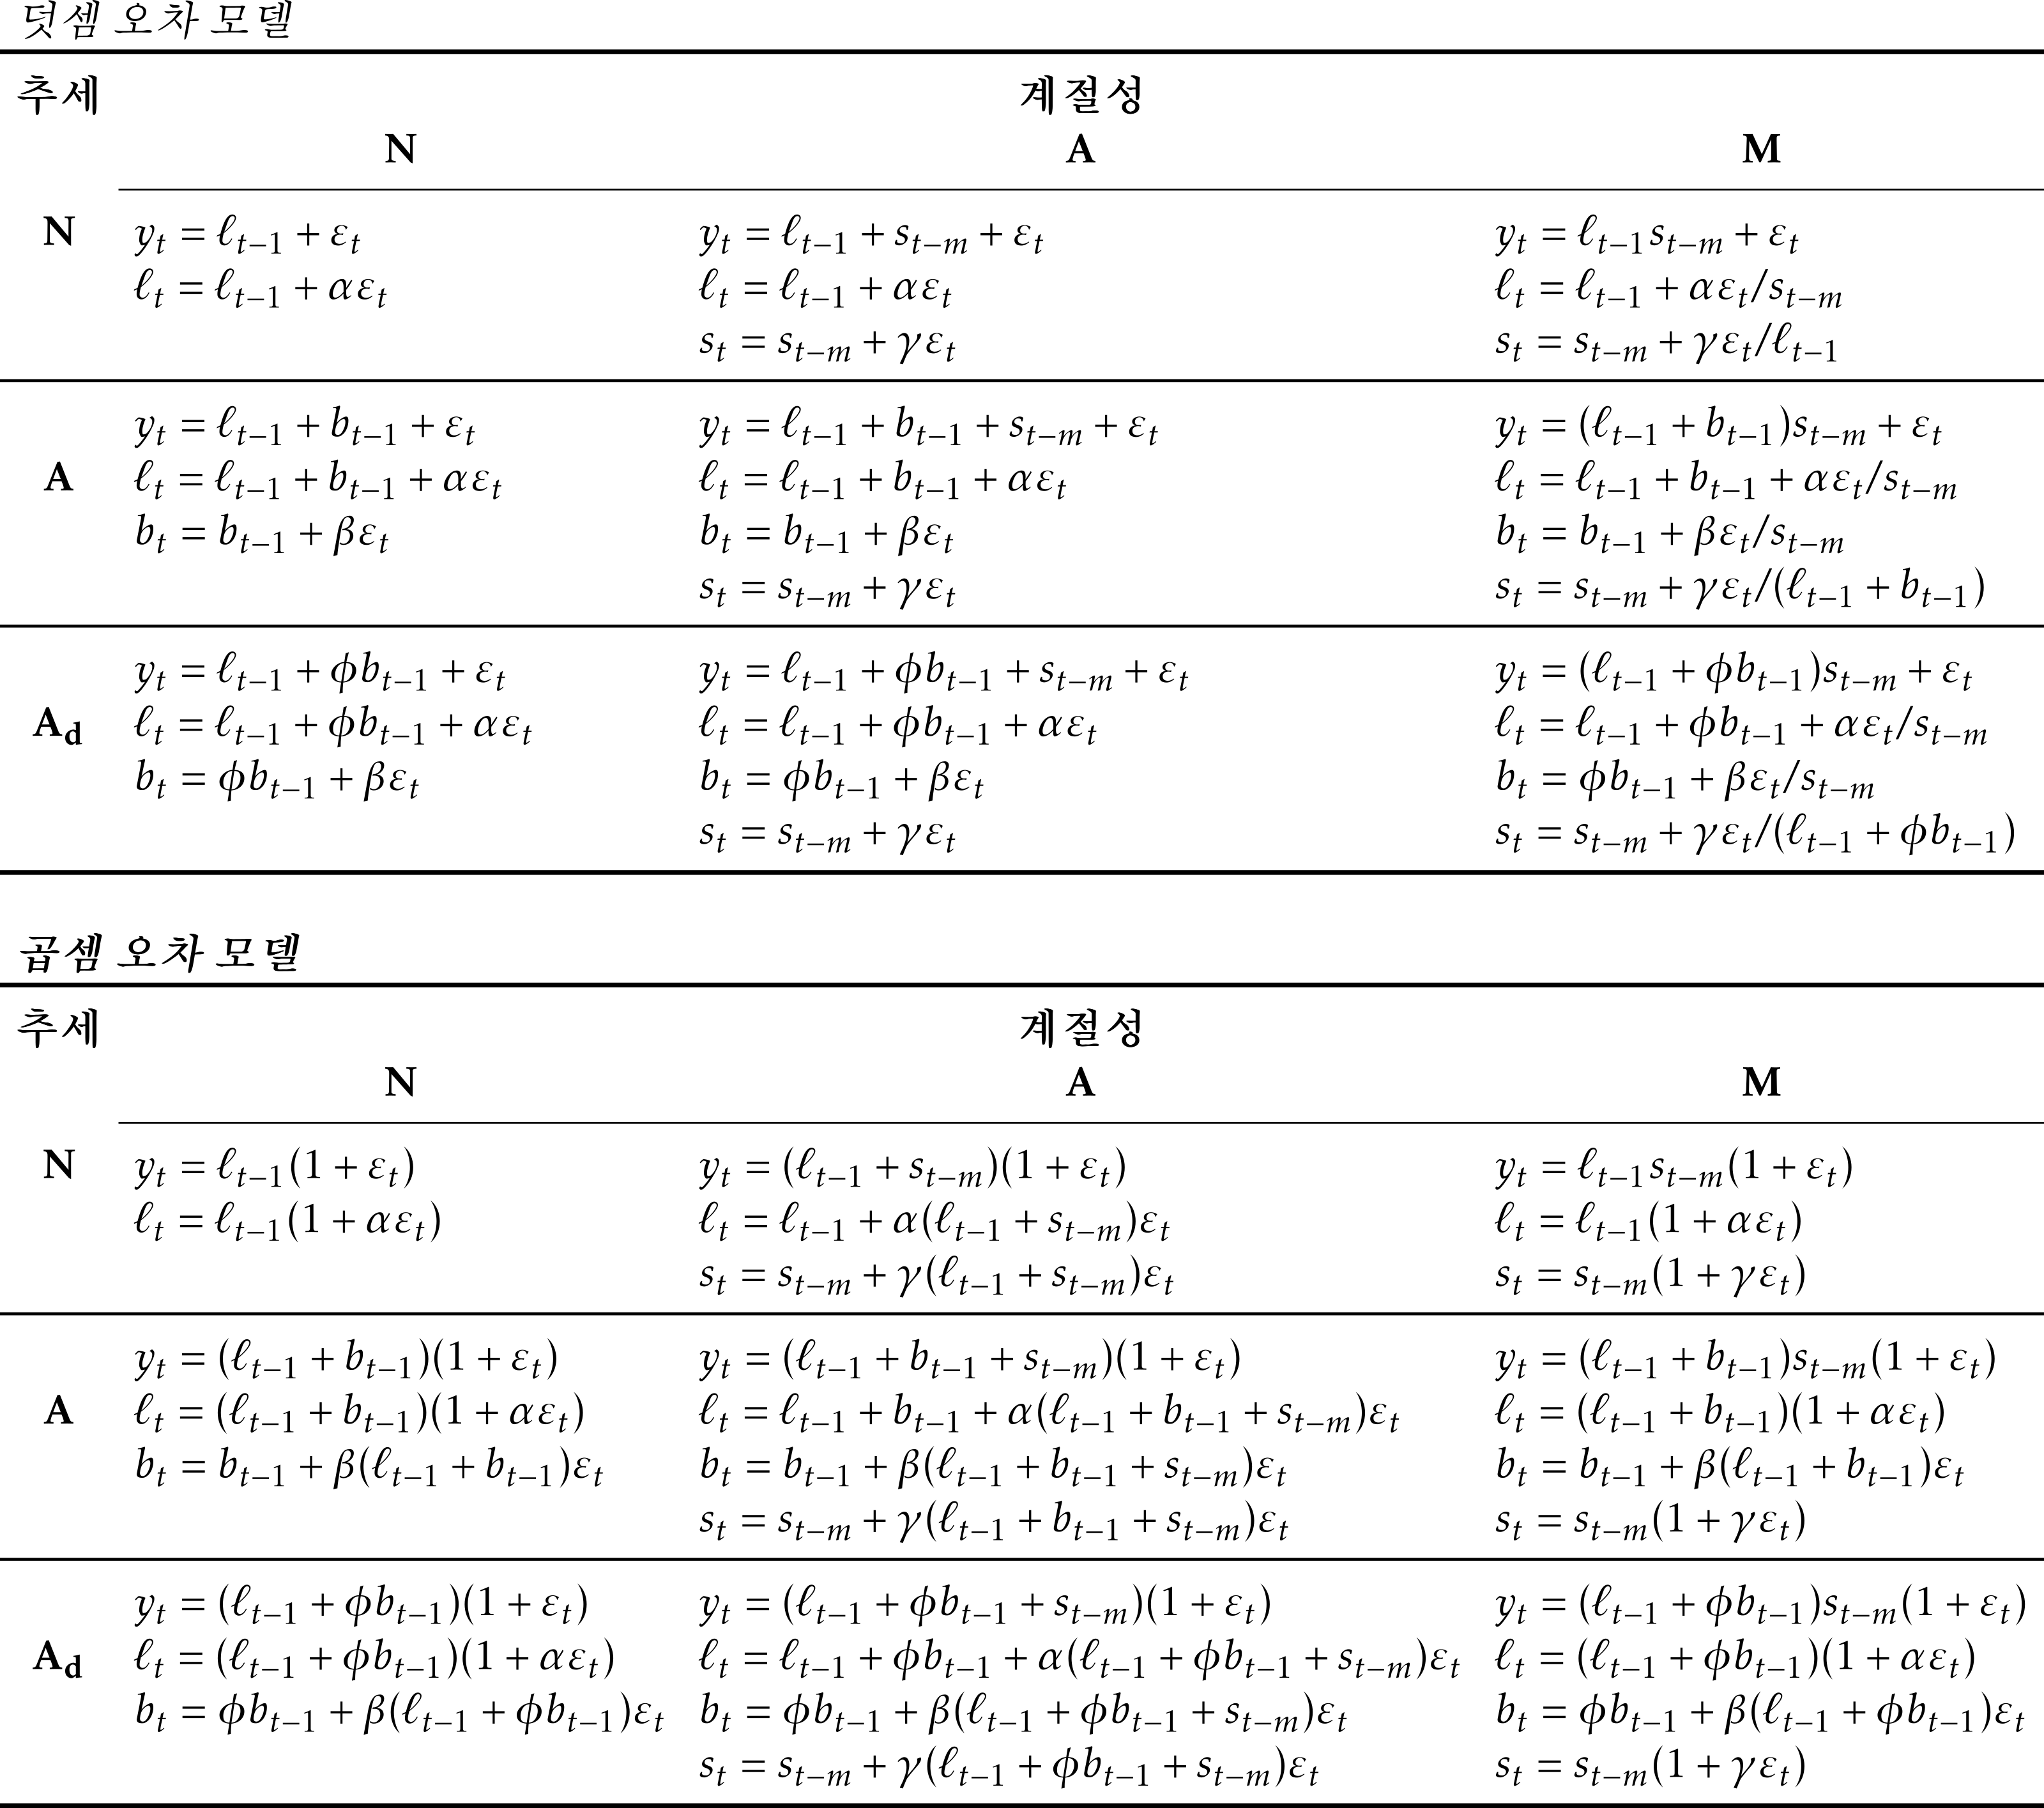

<br>

## 07.06. 추정과 모델 선택

<br>

### ETS 모델들 추정하기

제곱 오차의 합을 최소화하여 매개변수를 추정하는 방법의 한 가지 대안은 “가능도(또는 우도)likelihood”를 최대화하는 것입니다. 가능도(likelihood)는 특정한 모델에서 일어나는 데이터의 확률입니다. **그래서 큰 가능도는 좋은 모델과 관련 있습니다. 덧셈 오차 모델의 경우에, (오차가 정규 분포를 따른다고 가정하고) 가능도를 최대화하면 제곱 오차의 합을 최소화하는 것과 결과가 같습니다.** 하지만, 곱셈 오차 모델의 경우에는 서로 다른 결과를 낼 것입니다. 이 절에서는 가능도를 최대화하여 평활 매개변수 $α,β,γ,ϕ$과 초기 상태  $ℓ_0,b_0,s_0$,
$s_0,s_{-1},\dots,s_{-m+1}$을 구할 것입니다.

평활 매개변수가 가질 수 있는 값의 범위는 제한되어있습니다. 전통적으로는 관련 식이 가중평균으로 해석될 수 있도록 매개변수가 0과 1사이 범위로 제한됩니다. 즉, $0< \alpha,\beta^*,\gamma^*,\phi<1$입니다. 

상태 공간 모델의 경우에, $\beta=\alpha\beta^*$와 $\gamma=(1-\alpha)\gamma^*$로 두었습니다. 그래서 전통적인 제한조건이 $0< \alpha <1$, $0 < \beta < \alpha$, $0< \gamma < 1-\alpha$로 바뀝니다. 실제적인 상황에서는 수치적인 어려움을 막기 위해 보통은 감쇠 매개변수 $\phi$에도 제한을 둡니다. R에서는  $0.8<\phi<0.98$가 되도록 제한합니다.

상태 공간 모델의 수학적인 특성을 고려하는 것은 매개변수를 해석하는 또 다른 방법입니다. 현재 예측값에 지속적으로 영향을 미치는 먼 과거의 관측값을 방지하도록 매개변수에 제한 조건이 걸립니다. 이로부터 매개변수에 대한 몇 가지 허용성(admissibility) 제한 조건이 나옵니다. 이러한 제한 조건은 (항상 그렇지는 않지만) 보통은 전통적인 제한조건의 범위보다는 덜 제한적입니다(Hyndman et al., 2008, p. Ch10). 예를 들면, ETS(A,N,N) 모델의 경우에는, 흔히 사용하는 매개변수 범위는 $0< \alpha <1$이지만, 허용 범위는 $0< \alpha <2$입니다. ETS(A,A,N) 모델의 경우에는, 전통적인 매개변수 범위는 $0<\alpha<1$와 $0<\beta<\alpha$이지만, 허용 범위는 $0<\alpha<2$와 $0<\beta<4-2\alpha$입니다.

<br>

### 모델 선택

모델을 선택할 때 정보 기준을 사용할 수 있다는 것은 ETS 통계 체계의 큰 장점입니다. ETS 모델 중에서 주어진 시계열의 경우에 어떤 것이 가장 적절한지 결정하기 
$AIC$, $AIC_c$, $BIC$을 사용할 수 있습니다.

ETS 모델의 경우에 아카이케(Akaike)의 정보 기준(AIC)은 다음과 같이 정의됩니다.

$$\text{AIC} = -2\log(L) + 2k,$$

여기에서  $L$은 모델의 가능도(likelihood)이고, $k$ 는 잔차 분산을 포함하여 추정되는 매개변수와 초기 상태의 전체 개수입니다.

작은 표본에 대해 보정된 $AIC$는($AIC_c$) 다음과 같이 정의됩니다.

$$\text{AIC}_{\text{c}} = \text{AIC} + \frac{2k(k+1)}{T-k-1},$$

그리고 베이지안(Bayesian) 정보 기준($BIC$)은

$$\text{BIC} = \text{AIC} + k[\log(T)-2].$$

입니다.

(오차Error, 추세Trend, 계절성Seasonal)의 세 가지 성분의 조합에서 수치적으로 어려운 부분이 생길 수 있습니다. 구체적으로, 이러한 불안정성을 일으킬 수 있는 모델은 $ETS(A,N,M)$, $ETS(A,A,M)$, $ETS(A,A_d,M)$입니다. 상태 식에서 0에 가까운 값으로 나눌 수도 있기 때문입니다. 이런 특정 조합은 모델을 선택할 때 보통은 고려하지 않겠습니다.

**곱셈 오차를 이용하는 모델은 데이터가 분명하게 양수일 때는 유용합니다만, 데이터에 0이나 음수 값이 있으면 수치적으로 안정하지 않습니다. 그래서 곱셈 오차 모델은 시계열이 양수가 분명하게 양수가 아닐 때 사용하지 않을 것입니다. 이러한 경우에는 덧셈 오차만 이용하는 여섯 가지 모델만 적용할 것입니다.**



<br>

### R의 `ets()` 함수

R의 forecast 패키지에 있는 `ets()` 함수를 사용하여 모델을 추정할 수 있습니다. `ses()`, `holt()`, `hw()` 함수와는 달리, **`ets()` 함수는 예측값을 내진 않습니다. 대신에, 모델 매개변수를 추정하고, 맞춘 모델에 대한 정보를 돌려줍니다.** 다른 정보 기준을 선택할 수도 있긴 하지만, 이 함수는 적절한 모델을 고를 때 기본값으로 $AIC_c$ 를 사용합니다.



<br>

#### `ets(y, model, damped, alpha, beta, gamma, phi, lambda, biasadj, additive.only, restrict, allow.multiplicative.trend)`
- `y` : 예측할 시계열.
- `model` : 추정할 모델을 ETS 분류법과 표기법에 따라 나타내는 3자리 코드. 가능한 입력값은 다음과 같습니다. 
    - “N”은 없다는 것을, 
    -“A”는 덧셈,
    -“M”은 곱셈, 또는 “Z”는 자동으로 선택하는 것을 의미합니다. 
    - 각 입력값을 “Z”로 두면 정보 기준에 따라 성분을 선택합니다. 기본 설정값 ZZZ는 모든 성분을 정보 기준에 따라 선택하는 것을 의미합니다.

* `damped` : **만약에 `damped=TRUE`이면, 감쇠 추세 (A나 M 중에서 하나)를 사용할 것입니다.**
    * `damped=FALSE`이면, 비-감쇠 추세를 사용할 것입니다. 
    * `damped=NULL`(기본 설정값), 어떤 모델이 가장 낮은 정보 기준 값을 갖는지에 따라 감쇠와 비-감쇠 추세 중에서 하나를 선택할 것입니다.

- `alpha`, `beta`, `gamma`, `phi` : 평활 매개변수의 값은 이러한 입력값을 이용하여 구체적으로 정할 수 있습니다. 
    * 만약에 이러한 값을 NULL로 두면(각각에 대한 기본 설정값), 매개변수를 추정합니다.

* `lambda` : **박스-칵스(Box-Cox) 변환 매개변수.**
    * `lambda=NULL`이면(기본 설정값), 이 항목은 무시됩니다. 그렇지 않으면, 모델을 추정하기 전에, 시계열이 변환될 것입니다. 
    * lambda가 NULL이 아닐 때는, additive.only가 TRUE로 정해집니다.

* `biasadj` : TRUE이고 lambda가 NULL이 아니면, 역 변환된 적합값과 예측값이 편향에 대해 조정될 것입니다.

* `additive.only` : **`additive.only=TRUE`이면, 덧셈 성분을 이용하는 모델만 고려합니다. 그렇지 않으면, 모든 모델을 고려합니다.**

* `restrict` : **만약에 `restrict=TRUE`(기본 설정값), 수치적으로 어려운 부분이 생기는 모델을 모델을 선택할 때 고려하지 않습니다.**

* `allow.multiplicative.trend` : 곱셈 추세 모델도 사용할 수 있습니다만, 이 책에서는 다루지 않습니다. 이러한 모델을 고려하도록 하려면 이 입력을 TRUE로 두시길 바랍니다.

<br>

### `ets` 객체로 작업하기

`ets()` 함수는 ets 클래스의 객체를 돌려줄 것입니다. ets 객체로 작업하기 쉽도록 설계된 R 함수가 많이 있습니다.

#### `coef()` :  맞춘 매개변수 전부를 돌려줍니다.
#### `accuracy()` : 학습 데이터에 대해 계산된 정확도 측정값을 돌려줍니다.
#### `summary()` : 적합모델에 대한 몇 가지 요약 정보를 출력합니다.
#### `autoplot()`, `plot()` : 성분의 시간 그래프(time plot)를 그립니다.
* residuals() 추정한 모델에서 잔차(residual)를 돌려줍니다.

#### `fitted()` : 학습 데이터에 대한 한 단계 예측값을 돌려줍니다.
#### `simulate()` : 적합모델(fitted model)에서 미래 표본 경로(future sample path)를 모사합니다.
#### `forecast()` : 점 예측값(point forecast)과 예측구간(prediction interval)을 계산합니다.

<br>

### 예제: 호주를 방문하는 국제 여행객 숙박일 수


In [3]:
library(tidyverse)
library(fpp3)
library(fpp2)
library(fpp)
library(forecast)

In [6]:
aust <- window(austourists, start=2005)
fit <- ets(aust)
fit %>% summary

ETS(M,A,M) 

Call:
 ets(y = aust) 

  Smoothing parameters:
    alpha = 0.4041 
    beta  = 2e-04 
    gamma = 2e-04 

  Initial states:
    l = 32.1089 
    b = 0.6605 
    s = 1.0305 0.9445 0.7607 1.2643

  sigma:  0.0405

     AIC     AICc      BIC 
107.7032 120.5603 118.3057 

Training set error measures:
                      ME     RMSE     MAE        MPE   MAPE      MASE
Training set -0.06914985 1.333232 1.09393 -0.1686157 2.7147 0.3846379
                    ACF1
Training set -0.04274924

선택된 모델은 ETS(M,A,M)입니다:

$$\begin{align*}
y_{t} &= (\ell_{t-1} + b_{t-1})s_{t-m}(1 + \varepsilon_t)\\
\ell_t &= (\ell_{t-1} + b_{t-1})(1 + \alpha \varepsilon_t)\\
b_t &=b_{t-1} + \beta(\ell_{t-1} + b_{t-1})\varepsilon_t\\
s_t &=  s_{t-m}(1+ \gamma \varepsilon_t).
\end{align*}$$

매개변수 추정치는  $\hat\alpha=0.1908$, $\hat\beta=0.0392$, $\hat\gamma=0.0002$입니다. 출력값은 초기 상태 $ℓ
0
 , 
b
0
, 
s
0
, 
s
−
1
, 
s
−
2
, 
s
−
3
$에 대한 추정치도 돌려줍니다. 

곱셈 계절성을 이용한 홀트-윈터스(Holt-Winters) 기법으로 얻은 값과 비교해봅시다. 이 모델이 곱셈 홀트-윈터스(Holt-Winters) 기법으로 얻은 점 예측값과 같은 결과를 주긴 하더라도, 매개변수는 다른 방식으로 추정됩니다. `ets()` 함수에서는 기본 추정 기법으로 최소 제곱합(minimum sum of squares) 대신 최대 가능도(maximum likelihood)를 사용합니다.

그림은 모델이 생성한 점 예측값과 예측구간을 나타냅니다. **작은 $β$와 $γ$값은 기울기와 계절 성분이 시간에 따라서 아주 작게 변한다는 것을 뜻합니다. 좁은 예측 구간은 강한 추세와 계절성 때문에 비교적 시계열을 예측하기 쉽다는 것을 말합니다.**

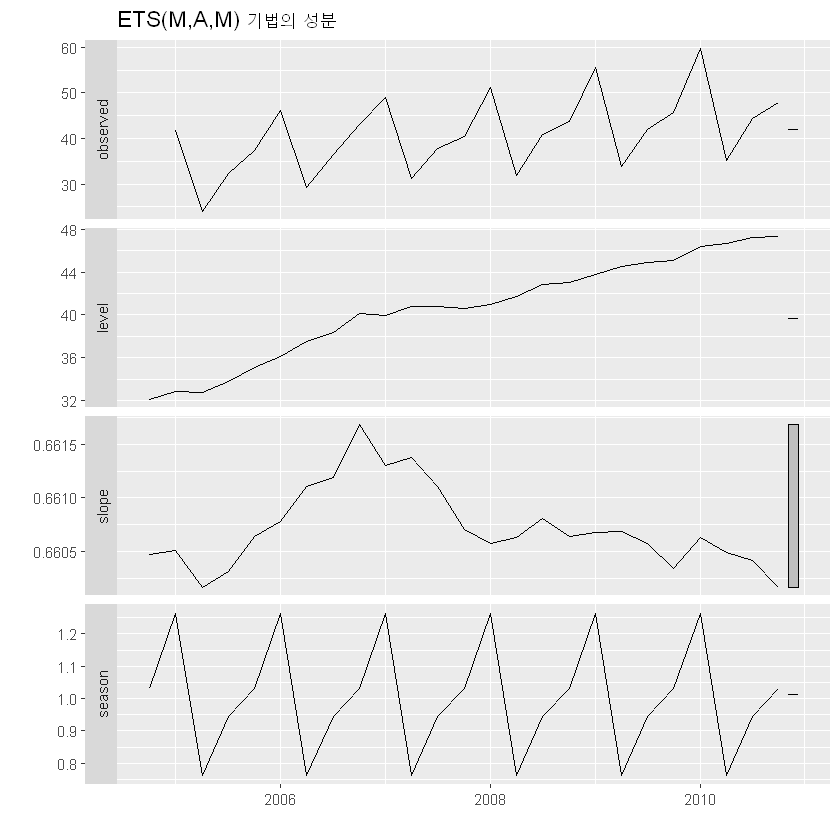

In [7]:
autoplot(fit) +
  ggtitle("ETS(M,A,M) 기법의 성분")

이 모델에 곱셈 오차가 있기 때문에, 잔차는 한 단계 학습 오차와 같지 않습니다. 잔차는 $\hat{\epsilon_t}$으로 주어지고, 한 단계 학습 오차는 $y_t - \hat{y}_{t|t-1}$ 로 정의됩니다. `residuals` 함수를 이용하여 두 가지 다 구할 수 있습니다.



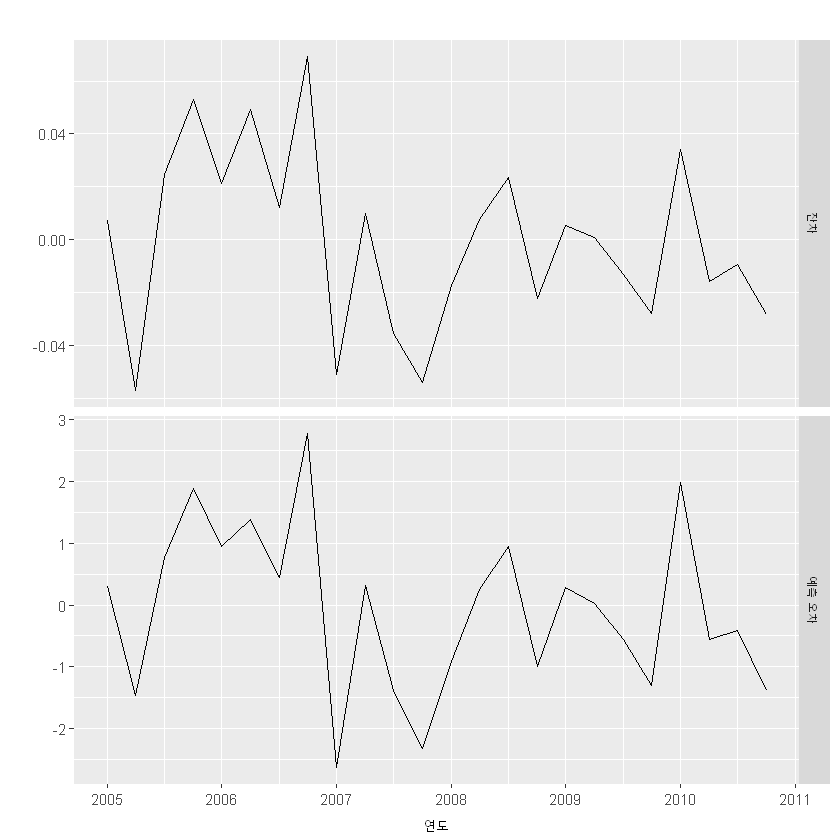

In [8]:
cbind('잔차' = residuals(fit),
      '예측 오차' = residuals(fit, type='response')) %>%
  autoplot(facet=TRUE) + xlab("연도") + ylab("")

잔차와 예측 오차를 구분하기 위해 `residuals()` 함수에서 `type` 입력값을 사용했습니다. 기본값은 `type='innovation'`이고 규칙적인 잔차를 돌려줍니다.



<br>

## 07.07. ETS 모델로 예측하기

$t=T+1,\dots,T+h$ 에 대한 식을 가지고 반복하고 $t  >T$에 대해 모두 $\varepsilon_t=0$로 둬서 점 예측값을 얻습니다.

예를 들면, ETS(M,A,N) 모델에 대해, $y_{T+1} = (\ell_T + b_T )(1+ \varepsilon_{T+1})$입니다. 따라서 $\hat{y}_{T+1|T}=\ell_{T}+b_{T}$입니다. 비슷하게,

$$\begin{align*}
y_{T+2} &= (\ell_{T+1} + b_{T+1})(1 + \varepsilon_{T+1})\\
        &= \left[
              (\ell_T + b_T) (1+ \alpha\varepsilon_{T+1}) +
              b_T + \beta (\ell_T + b_T)\varepsilon_{T+1}
            \right]
   ( 1 + \varepsilon_{T+1})
\end{align*}$$

입니다. 따라서, $\hat{y}_{T+2|T}= \ell_{T}+2b_{T}$ 입니다. 이러한 예측값은 홀트(Holt)의 선형 기법으로 얻은 예측값과 같고, ETS(A,A,N) 모델로 얻은 것과 같습니다. 따라서, 이 기법으로 얻은 것과 이 기법을 이루는 두 모델로 얻은 예측값은 (같은 매개변수 값을 사용했다고 가정하면) 같습니다.

ETS 점 예측값은 예측 분포의 중간값(median)과 같습니다. 덧셈 성분만 이용하는 모델의 경우에는, 예측 분포가 정규 분포라서, 평균과 중앙값이 같습니다. 곱셈 오차를 이용하는 ETS 모델의 경우나 곱셈 계절성을 이용하는 경우에는, 점 예측값은 예측분포의 평균값과 같지 않을 것입니다.

ETS 모델에서 예측값을 얻기 위해, `forecast()` 함수를 사용합니다.

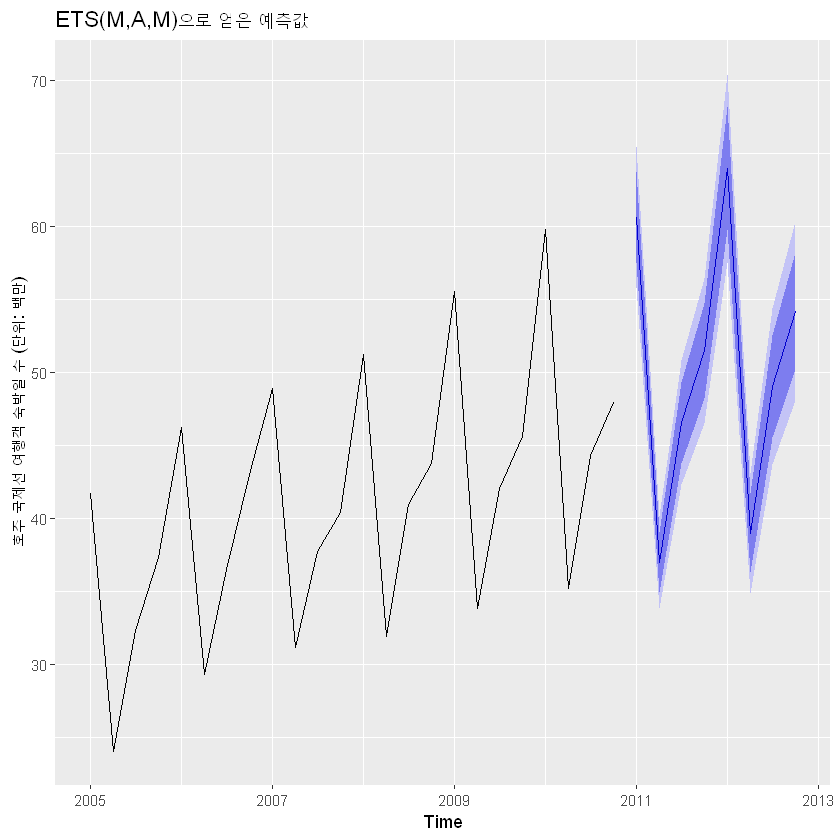

In [9]:
fit %>% forecast(h=8) %>%
  autoplot() +
  ylab("호주 국제선 여행객 숙박일 수 (단위: 백만)") +
  ggtitle("ETS(M,A,M)으로 얻은 예측값")

<br>

### 예측구간

예측구간(prediction interval)도 생성할 수 있다는 것은 지금까지 다룬 모델의 커다란 장점입니다. 몇몇 모델은 이러한 방법으로 얻을 수 없습니다. 예측구간은 덧셈 기법과 곱셈 기법에서 다르게 나타납니다.

대부분의 ETS 모델에 대해, 예측구간은 다음과 같이 쓸 수 있습니다.

$$\hat{y}_{T+h|T} \pm k \sigma_h$$

여기에서$ 
k$
는 포함확률(coverage probability)에 따라 달라지고, 
$σ_h$
는 예측 분산입니다. 
주어져 있습니다. ETS 모델에서  $σ_h$에 대한 식은 복잡할 수 있습니다. 자세한 내용은 Hyndman et al. (2008) 의 6장에 있습니다. 표에는, 그 중에서 가장 단순한 식인 덧셈 ETS 에 대한 식이 있습니다.



- $(A, N, N)$ 모델 : 예측분산 $\sigma_h^2 = \sigma^2\big[1 + \alpha^2(h-1)\big]$

- $(A,A,N)$ 모델 : 예측분산 $\sigma_h^2 = \sigma^2\Big[1 + (h-1)\big\{\alpha^2 + \alpha\beta h + \frac16\beta^2h(2h-1)\big\}\Big]$

- $(A,A 
d
 ,N)$ 모델 : 예측분산 $\sigma_h^2 = \sigma^2\biggl[1 + \alpha^2(h-1) + \frac{\beta\phi h}{(1-\phi)^2} \left\{2\alpha(1-\phi) +\beta\phi\right\} \mbox{} - \frac{\beta\phi(1-\phi^h)}{(1-\phi)^2(1-\phi^2)} \left\{ 2\alpha(1-\phi^2)+ \beta\phi(1+2\phi-\phi^h)\right\}\biggr]$

- $(A,N,A)	 
$ 모델 : 예측분산 $\sigma_h^2 = \sigma^2\Big[1 + \alpha^2(h-1) + \gamma k(2\alpha+\gamma)\Big]$

- $(A,A,A)	 
$ 모델 : 예측분산 $\sigma_h^2 = \sigma^2\Big[1 + (h-1)\big\{\alpha^2 + \alpha\beta h + \frac16\beta^2h(2h-1)\big\} \mbox{} + \gamma k \big\{2\alpha+ \gamma + \beta m (k+1)\big\} \Big]$

- $(A,A_d
 ,A)$ 모델 : 예측분산 $\sigma_h^2 = \sigma^2\biggl[1 + \alpha^2(h-1) + \gamma k(2\alpha+\gamma) \mbox{} +\frac{\beta\phi h}{(1-\phi)^2} \left\{2\alpha(1-\phi) + \beta\phi \right\} \mbox{} - \frac{\beta\phi(1-\phi^h)}{(1-\phi)^2(1-\phi^2)} \left\{ 2\alpha(1-\phi^2)+ \beta\phi(1+2\phi-\phi^h)\right\} \mbox{} + \frac{2\beta\gamma\phi}{(1-\phi)(1-\phi^m)}\left\{k(1-\phi^m) - \phi^m(1-\phi^{mk})\right\}\biggr]$

몇 가지 ETS 모델에서, 예측 구간에 대한 식이 알려져 있지 않습니다. 이러한 경우에는, forecast() 함수가 모사한 미래 표본 경로(future sample path)를 사용하고, 모사한 미래 경로의 백분위수(percentile)에서 예측 구간을 계산합니다.

<br>

### `forecast()` 사용하기


#### `forecast(object, h ,level, fan, simulate, bootstrap,npaths, PI, lambda, biasadj, ...)`

- `object` : `ets()` 함수가 돌려주는 객체.

- `h` : 예측 범위 — 예측할 기간의 개수.
    * 기본값 : ifelse(object$m>1, 2*object$m, 10)

- `level` : 예측구간에 대한 신뢰 수준.
    * 기본값 : c(80,95)

- `fan` : 만약에 `fan=TRUE`이면, `level=seq(50,99,by=1)`
    * 부채 그래프(fan plot 또는 fan chart)의 경우에 알맞습니다.

- `simulate` : 만약에 `simulate=TRUE`이면, 대수적인 식을 사용하는 대신에, 모사하여 예측 구간을 돌려줍니다. 
    * `simulate=FALSE`이더라도, 특정 모델에 대해 사용할 수 있는 대수적인 식이 없는 경우라면, 모사를 할 것입니다.

- `bootstrap` : 만약에 `bootstrap=TRUE`이고 `simulate=TRUE`이면, 정규 분포를 이루는 오차 대신, 모사한 예측 구간에서 다시 뽑아서 만든 오차를 사용합니다.

- `npaths` : 모사 예측 구간을 계산할 때 사용하는 표본 경로의 수.

- `PI` : 만약에 `PI=TRUE`이면, 예측 구간을 그립니다; 그렇지 않은 경우에는 점 예측치만 계산합니다.

- `lambda` : 박스-칵스(Box-Cox) 변환 매개변수. 만약에 lambda=NULL이면, 이 항목이 무시됩니다. 그렇지 않은 경우에는, 예측값이 역 박스-칵스(Box-Cox) 변환을 통해 역 변환됩니다.

- `biasadj` : 만약에 lambda가 NULL이 아니면, 역 변환된 예측값이 (그리고 예측 구간이) 편향에 대해 조정됩니다.